In [47]:
import pandas as pds
# the normal file
normal_file = './results/normal_detail.csv'
normal_l3_file = './results/normal_l3_detail.csv'

repeat_file = './results/repeat_detail.csv'
repeat_l3_file = './results/repeat_l3_detail.csv'

In [62]:
def generate_report(detail_file, outfile):
    df = pds.DataFrame.from_csv(detail_file, sep='\t', index_col=[0,8,9,10, 12,13], encoding='utf-8')
    # 计算中奖概率
    _sum = df.groupby(level=[u'月份', u'策略1']).sum()[[u"支出", u"盈利", u"中奖标记"]]
    _mean = df.groupby(level=[u'月份', u'策略1']).mean()[[u"中奖标记", u"支出", u"盈利"]]
    _size = df.groupby(level=[u'月份', u'策略1']).size()
    month_zhichu = pds.concat([_sum, _size, _mean], axis=1)
    month_zhichu.columns = [u"总支出", u"总盈利", u"中奖次数", u"购买次数", u"中奖概率",u"平均支出", u"平均盈利"]
    month_zhichu = pds.concat([month_zhichu, 1. * month_zhichu[u"总盈利"] / month_zhichu[u"总支出"]], axis=1)
    month_zhichu.columns = [u"总支出", u"总盈利", u"中奖次数", u"购买次数", u"中奖概率",u"平均支出", u"平均盈利", u"盈利率"]
    probs = pds.concat([df.groupby(level=[u'策略2']).sum()[[u"支出", u"盈利", u"中奖标记"]], df.groupby(level=[u'策略2']).size(), df.groupby(level=[u'策略2']).mean()[[u"中奖标记", u"支出", u"盈利"]]], axis=1)
    probs.columns = [u"总支出", u"总盈利", u"中奖次数", u"购买次数", u"中奖概率",u"平均支出", u"平均盈利"]
    probs = pds.concat([probs, 1. * probs[u"总盈利"] / probs[u"总支出"]], axis=1)
    probs.columns = [u"总支出", u"总盈利", u"中奖次数", u"购买次数", u"中奖概率",u"平均支出", u"平均盈利", u"盈利率"]
    
    with pds.ExcelWriter(outfile) as writer:
        month_zhichu.to_excel(writer, sheet_name=u"月统计")
        probs.to_excel(writer, sheet_name=u"信号统计")
    return df, probs, month_zhichu

In [63]:
df, probs, month_zhichu = generate_report(normal_file, "./正常下注.xlsx")
df, probs, month_zhichu = generate_report(normal_l3_file, "./正常下注_冷3.xlsx")
df, probs, month_zhichu = generate_report(repeat_file, "./连续下注.xlsx")
df, probs, month_zhichu = generate_report(repeat_l3_file, "./连续下注_冷3.xlsx")

In [51]:
probs

,总支出,总盈利,中奖次数,购买次数,中奖概率,平均支出,平均盈利,盈利率
策略2,,,,,,,,
10-1,56436,-6396,278,981,0.283384,57.529052,-6.519878,-0.113332
11-1,45606,-7086,214,810,0.264198,56.303704,-8.748148,-0.155374
12-1,33300,-3780,164,591,0.277496,56.345178,-6.395939,-0.113514
13-1,23796,-6876,94,420,0.223810,56.657143,-16.371429,-0.288956
14-1,14130,-2070,67,249,0.269076,56.746988,-8.313253,-0.146497
15-1,10278,-198,56,180,0.311111,57.100000,-1.100000,-0.019264
16-1,6618,-1038,31,117,0.264957,56.564103,-8.871795,-0.156845
17-1,4902,-1482,19,87,0.218391,56.344828,-17.034483,-0.302326
18-1,3768,-1068,15,66,0.227273,57.090909,-16.181818,-0.283439


In [46]:
probs

,总支出,总盈利,中奖次数,购买次数,中奖概率,平均支出,平均盈利,盈利率
策略2,,,,,,,,
10-1,10330,-250,56,133,0.421053,77.669173,-1.879699,-0.024201
10-2,6106,-706,30,77,0.389610,79.298701,-9.168831,-0.115624
10-3,3680,-620,17,47,0.361702,78.297872,-13.191489,-0.168478
11-1,6178,-598,31,80,0.387500,77.225000,-7.475000,-0.096795
11-2,3900,60,22,49,0.448980,79.591837,1.224490,0.015385
11-3,2090,-290,10,27,0.370370,77.407407,-10.740741,-0.138756
12-1,4744,-424,24,63,0.380952,75.301587,-6.730159,-0.089376
12-2,3064,176,18,39,0.461538,78.564103,4.512821,0.057441
12-3,1660,-40,9,21,0.428571,79.047619,-1.904762,-0.024096


In [42]:
_sum = df.groupby(level=['月份', '策略1']).sum()[["支出", "盈利", "中奖标记"]]
_mean = df.groupby(level=['月份', '策略1']).mean()[["中奖标记", "支出", "盈利"]]
_size = df.groupby(level=['月份', '策略1']).size()
month_zhichu = pds.concat([_sum, _size, _mean], axis=1)
month_zhichu.columns = ["总支出", "总盈利", "中奖次数", "购买次数", "中奖概率","平均支出", "平均盈利"]
month_zhichu = pds.concat([month_zhichu, 1. * month_zhichu["总盈利"] / month_zhichu["总支出"]], axis=1)
month_zhichu.columns = ["总支出", "总盈利", "中奖次数", "购买次数", "中奖概率","平均支出", "平均盈利", "盈利率"]
probs = pds.concat([df.groupby(level=['策略2']).sum()[["支出", "盈利", "中奖标记"]], df.groupby(level=['策略2']).size(), df.groupby(level=['策略2']).mean()[["中奖标记", "支出", "盈利"]]], axis=1)
probs.columns = ["总支出", "总盈利", "中奖次数", "购买次数", "中奖概率","平均支出", "平均盈利"]
probs = pds.concat([probs, 1. * probs["总盈利"] / probs["总支出"]], axis=1)
probs.columns = ["总支出", "总盈利", "中奖次数", "购买次数", "中奖概率","平均支出", "平均盈利", "盈利率"]

In [43]:
month_zhichu

总支出   总盈利  中奖次数  购买次数      中奖概率       平均支出       平均盈利  \
月份         策略1                                                              
2013-04-01 1不中后    3412  -352    17    45  0.377778  75.822222  -7.822222   
           连４中１后   1584    36     9    21  0.428571  75.428571   1.714286   
2013-05-01 1不中后   56134 -1774   302   728  0.414835  77.107143  -2.436813   
           连４中１后  28408 -2488   144   369  0.390244  76.986450  -6.742547   
2013-06-01 1不中后   50620 -6520   245   653  0.375191  77.519142  -9.984686   
           连４中１后  31600 -6580   139   410  0.339024  77.073171 -16.048780   
2013-07-01 1不中后   50454 -6174   246   653  0.376723  77.264931  -9.454824   
           连４中１后  30318 -1518   160   391  0.409207  77.539642  -3.882353   
2013-08-01 1不中后   54516 -6276   268   703  0.381223  77.547653  -8.927454   
           连４中１后  28690  1010   165   369  0.447154  77.750678   2.737127   
2013-09-01 1不中后   48180 -6240   233   619  0.376414  77.835218 -10.080775   
           连４中１后  32354 -3914   158   419  0.377088  77.217184  -9.341289   
2013-10-01 1不中后   55958 -7358   270   723  0.373444  77.396957 -10.177040   
           连４中１后  30138 -1518   159   388  0.409794  77.675258  -3.912371   
2013-11-01 1不中后   49826 -5186   248   644  0.385093  77.369565  -8.052795   
           连４中１后  31566 -5826   143   408  0.350490  77.367647 -14.279412   
2013-12-01 1不中后   56980 -5320   287   742  0.386792  76.792453  -7.169811   
           连４中１后  32914 -5554   152   426  0.356808  77.262911 -13.037559   
2014-01-01 1不中后   48814 -6154   237   631  0.375594  77.359746  -9.752773   
           连４中１后  31836 -4116   154   412  0.373786  77.271845  -9.990291   
2014-02-01 1不中后   38018 -4358   187   493  0.379310  77.115619  -8.839757   
           连４中１后  23190 -4110   106   298  0.355705  77.818792 -13.791946   
2014-03-01 1不中后   52208 -4868   263   676  0.389053  77.230769  -7.201183   
           连４中１后  29438 -1718   154   382  0.403141  77.062827  -4.497382   
2014-04-01 1不中后   45166 -4666   225   584  0.385274  77.339041  -7.989726   
           连４中１后  31990 -2110   166   414  0.400966  77.270531  -5.096618   
2014-05-01 1不中后   50810 -8870   233   658  0.354103  77.218845 -13.480243   
           连４中１后  31166 -2906   157   404  0.388614  77.143564  -7.193069   
2014-06-01 1不中后   49838 -5198   248   648  0.382716  76.910494  -8.021605   
           连４中１后  28790 -1970   149   375  0.397333  76.773333  -5.253333   
...                 ...   ...   ...   ...       ...        ...        ...   
2015-01-01 1不中后   55396 -4636   282   715  0.394406  77.476923  -6.483916   
           连４中１后  27130   410   153   353  0.433428  76.855524   1.161473   
2015-02-01 1不中后   30694 -5494   140   398  0.351759  77.120603 -13.804020   
           连４中１后  22670 -1250   119   294  0.404762  77.108844  -4.251701   
2015-03-01 1不中后   52202 -5222   261   673  0.387816  77.566122  -7.759287   
           连４中１后  30682 -1882   160   392  0.408163  78.270408  -4.801020   
2015-04-01 1不中后   50000 -6260   243   650  0.373846  76.923077  -9.630769   
           连４中１后  30248 -3068   151   389  0.388175  77.758355  -7.886889   
2015-05-01 1不中后   49236 -5676   242   638  0.379310  77.172414  -8.896552   
           连４中１后  30272 -1652   159   390  0.407692  77.620513  -4.235897   
2015-06-01 1不中后   49692 -5952   243   646  0.376161  76.922601  -9.213622   
           连４中１后  28220  -680   153   366  0.418033  77.103825  -1.857923   
2015-07-01 1不中后   53630 -8090   253   695  0.364029  77.165468 -11.640288   
           连４中１后  28434     6   158   367  0.430518  77.476839   0.016349   
2015-08-01 1不中后   52938 -5778   262   684  0.383041  77.394737  -8.447368   
           连４中１后  26402   418   149   341  0.436950  77.425220   1.225806   
2015-09-01 1不中后   51788 -3728   267   669  0.399103  77.411061  -5.572496   
           连４中１后  28860   -60   160   373  0.428954  77.372654  -0.160858   
2015-10-01 1不中后   51750 -2070   276   668  0.413174  77.470060  -3.098802   
           连４中１后

In [29]:
1. * probs["总盈利"] / probs["总支出"]

策略2
10-1   -0.024201
10-2   -0.115624
10-3   -0.168478
11-1   -0.096795
11-2    0.015385
11-3   -0.138756
12-1   -0.089376
12-2    0.057441
12-3   -0.024096
13-1   -0.344660
13-2   -0.315217
13-3   -0.175573
14-1   -0.107143
14-2    0.172638
14-3    0.153846
15-1   -0.419355
15-2    0.069610
15-3   -0.150943
16-1    0.406250
16-2   -1.000000
16-3    0.153846
17-1   -0.166667
17-2   -1.000000
17-3   -1.000000
18-1   -1.000000
18-2    0.578947
18-3    1.500000
19-1    0.250000
19-2    1.500000
20-1   -1.000000
20-2   -1.000000
20-3    1.500000
22-1    1.500000
4-1    -0.076414
4-2    -0.140423
4-3    -0.101019
5-1    -0.106766
5-2    -0.072115
5-3    -0.023748
6-1    -0.007678
6-2    -0.152465
6-3    -0.100066
7-1    -0.074460
7-2     0.013973
7-3    -0.264687
8-1    -0.135567
8-2    -0.065266
8-3    -0.183915
9-1    -0.096497
9-2    -0.067202
9-3    -0.074229
１不中    -0.104717
２不中    -0.106643
３不中    -0.090669
dtype: float64

In [40]:
df

,,,,,,当期号码,选号,码信息,中奖标记,开奖号码,支出,盈利,倍数
期数,策略1,策略2,策略3,月份,日期,,,,,,,,
130429062,1不中后,１不中,１不中,2013-04-01,2013-04-29,95741,"015679,245789","4382,1630,",0,67801,216,-216,3倍
130429063,1不中后,２不中,２不中,2013-04-01,2013-04-29,67801,"134567,245789","0982,1630,",1,11039,432,648,6倍
130429073,连４中１后,6-1,4-1,2013-04-01,2013-04-29,47475,"013458,0124679","7629,5838,",1,71242,252,288,3倍
130429082,连４中１后,4-1,4-1,2013-04-01,2013-04-29,37098,"123457,024569","9860,8731,",0,7888,216,-216,3倍
130429083,连４中１后,4-2,4-2,2013-04-01,2013-04-29,7888,"123459,024569","8760,8731,",1,70044,432,648,6倍
130429090,1不中后,１不中,１不中,2013-04-01,2013-04-29,39298,"123456,123459","9807,8760,",0,36689,216,-216,3倍
130429091,1不中后,２不中,２不中,2013-04-01,2013-04-29,36689,"1234569,1234578","8707,9060,",0,70388,588,-588,6倍
130429092,1不中后,３不中,３不中,2013-04-01,2013-04-29,70388,"1234569,123459","8707,8760,",1,77563,756,864,9倍
130429099,连４中１后,5-1,4-1,2013-04-01,2013-04-29,64102,"135678,134578","0924,2960,",0,98007,216,-216,3倍


In [39]:
import pandas as pds
df = pds.DataFrame.from_csv('./filter_detail.csv', sep='\t', index_col=[0,8,9,10, 12,13])

In [1]:
%matplotlib inline

In [48]:
# 计算月收益
gy_month = df.groupby(level="月份")
gy_month.sum()[["支出","盈利"]].to_csv("xin_zhichu.csv")
pds.concat([df.groupby(level=["月份","策略1"])["盈利"].sum(), df.groupby(level=["月份","策略1"])["中奖标记"].mean()], axis=1).to_csv("xin_shouyi_summ.csv")

,当期号码,中奖标记,开奖号码,支出,盈利
月份,,,,,
2013-04-01,2955155,21,3203983,20532,-1092
2013-05-01,43803602,353,43589793,344448,-18828
2013-06-01,44011136,314,43000088,344658,-51978
2013-07-01,41821978,316,40303053,339216,-48696
2013-08-01,44443593,361,43938184,341652,7728
2013-09-01,42455839,318,42401740,322524,-24984
2013-10-01,43491751,348,41968682,335430,-18990
2013-11-01,42150222,311,42500058,339540,-53880
2013-12-01,47959342,357,48230010,376872,-63132


In [106]:
gy_month = df.groupby(level="月份")
c3_month = df.groupby(level=["策略3"])
pds.concat([df.groupby(level=["月份","策略1"])["盈利"].sum(), df.groupby(level=["月份","策略1"])["中奖标记"].mean()], axis=1).to_csv("shouyi_summ.csv")
pds.concat([df.groupby(level=["策略1","策略3"])["盈利"].sum(), df.groupby(level=["策略1","策略3"])["中奖标记"].mean()], axis=1)

盈利      中奖标记
策略1   策略3                  
1不中后  １不中 -253416  0.384214
      ２不中 -305760  0.384857
      ３不中 -251154  0.391216
连４中１后 4-1 -114546  0.395052
      4-2 -174432  0.387062
      4-3 -162324  0.385085

In [108]:
pds.concat([df.groupby(level=["策略1","策略3"])["中奖标记"].count(), df.groupby(level=["策略1","策略3"])["中奖标记"].sum()], axis=1).to_csv('1.csv')

In [89]:
c3_month["中奖标记"].count()["4-1"], c3_month["中奖标记"].sum()/c3_month["中奖标记"].count()["4-1"]

(6184,
 策略3
4-1    0.395052
4-2    0.234153
4-3    0.142788
１不中    0.642303
２不中    0.396184
３不中    0.247736
Name: 中奖标记, dtype: float64)

In [69]:
c2_month = df.groupby(level=["策略2"])
pds.concat([c2_month["中奖标记"].mean(), c2_month["盈利"].sum()], axis=1).to_csv('策略.csv')

,中奖标记,盈利
策略2,,
10-1,0.432000,126
10-2,0.380282,-4596
10-3,0.363636,-5148
11-1,0.383562,-1752
11-2,0.444444,156
11-3,0.360000,-2934
12-1,0.368421,-1560
12-2,0.500000,2496
12-3,0.333333,-2934


In [102]:
type(df.groupby(level=["月份","策略1","策略3"])["中奖标记"].count())

pandas.core.series.Series

In [103]:
pds.concat([df.groupby(level=["月份","策略1","策略3"])["中奖标记"].count(), df.groupby(level=["月份","策略1","策略3"])["中奖标记"].sum()], axis=1).to_csv('1.csv')

In [61]:
gy_month["支出", "盈利"].sum()

,支出,盈利
月份,,
2013-04-01,25080,-780
2013-05-01,422382,-22242
2013-06-01,423930,-62670
2013-07-01,408966,-42846
2013-08-01,422028,-8928
2013-09-01,409296,-44256
2013-10-01,435942,-43362
2013-11-01,413496,-56016
2013-12-01,454482,-68382


In [56]:
pds.concat([c1_month["盈利"].sum(), c1_month["中奖标记"].mean()], axis=1)

盈利      中奖标记
月份         策略1                   
2013-04-01 1不中后   -1176  0.377778
           连４中１后    396  0.428571
2013-05-01 1不中后  -17886  0.414835
           连４中１后  -4356  0.390244
2013-06-01 1不中后  -29208  0.375191
           连４中１后 -33462  0.339024
2013-07-01 1不中后  -34278  0.376723
           连４中１后  -8568  0.409207
2013-08-01 1不中后  -20142  0.381223
           连４中１后  11214  0.447154
2013-09-01 1不中后  -26316  0.376414
           连４中１后 -17940  0.377088
2013-10-01 1不中后  -33774  0.373444
           连４中１后  -9588  0.409794
2013-11-01 1不中后  -24534  0.385093
           连４中１后 -31482  0.350490
2013-12-01 1不中后  -38796  0.386792
           连４中１后 -29586  0.356808
2014-01-01 1不中后  -40686  0.375594
           连４中１后 -23562  0.373786
2014-02-01 1不中后  -19446  0.379310
           连４中１后 -21948  0.355705
2014-03-01 1不中后  -29220  0.389053
           连４中１后 -10752  0.403141
2014-04-01 1不中后  -23838  0.385274
           连４中１后  -7764  0.400966
2014-05-01 1不中后  -45276  0.354103
           连４中１后 -21402  0.388614
2014-06-01 1不中后  -35808  0.382716
           连４中１后 -13008  0.397333
...                 ...       ...
2014-10-01 1不中后   -8664  0.412044
           连４中１后 -10158  0.398458
2014-11-01 1不中后    5544  0.429688
           连４中１后 -36540  0.326291
2014-12-01 1不中后  -35700  0.373512
           连４中１后 -10098  0.398568
2015-01-01 1不中后  -15822  0.394406
           连４中１后  -1098  0.433428
2015-02-01 1不中后  -28836  0.351759
           连４中１后  -5514  0.404762
2015-03-01 1不中后  -28794  0.387816
           连４中１后 -10416  0.408163
2015-04-01 1不中后  -38238  0.373846
           连４中１后 -15120  0.388175
2015-05-01 1不中后  -27744  0.379310
           连４中１后 -10518  0.407692
2015-06-01 1不中后  -27954  0.376161
           连４中１后   2652  0.418033
2015-07-01 1不中后  -36198  0.364029
           连４中１后   2640  0.430518
2015-08-01 1不中后  -26706  0.383041
           连４中１后     36  0.436950
2015-09-01 1不中后  -21024  0.399103
           连４中１后  -1128  0.428954
2015-10-01 1不中后   -5520  0.413174
           连４中１后 -24402  0.377551
2015-11-01 1不中后  -14058  0.400338
           连４中１后 -35262  0.360902
2015-12-01 1不中后    1254  0.422535
           连４中１后 -16446  0.340000

[66 rows x 2 columns]

In [49]:
c1_month["中奖标记"].mean()

月份          策略1  
2013-04-01  1不中后     0.377778
            连４中１后    0.428571
2013-05-01  1不中后     0.414835
            连４中１后    0.390244
2013-06-01  1不中后     0.375191
            连４中１后    0.339024
2013-07-01  1不中后     0.376723
            连４中１后    0.409207
2013-08-01  1不中后     0.381223
            连４中１后    0.447154
2013-09-01  1不中后     0.376414
            连４中１后    0.377088
2013-10-01  1不中后     0.373444
            连４中１后    0.409794
2013-11-01  1不中后     0.385093
...
2015-05-01  连４中１后    0.407692
2015-06-01  1不中后     0.376161
            连４中１后    0.418033
2015-07-01  1不中后     0.364029
            连４中１后    0.430518
2015-08-01  1不中后     0.383041
            连４中１后    0.436950
2015-09-01  1不中后     0.399103
            连４中１后    0.428954
2015-10-01  1不中后     0.413174
            连４中１后    0.377551
2015-11-01  1不中后     0.400338
            连４中１后    0.360902
2015-12-01  1不中后     0.422535
            连４中１后    0.340000
Name: 中奖标记, Length: 66, dtype: float64

In [31]:
gy_month.sum()[["支出", "盈利"]].plot()

,支出,盈利
月份,,
2013-04-01,25080,-780
2013-05-01,422382,-22242
2013-06-01,423930,-62670
2013-07-01,408966,-42846
2013-08-01,422028,-8928
2013-09-01,409296,-44256
2013-10-01,435942,-43362
2013-11-01,413496,-56016
2013-12-01,454482,-68382


In [18]:
profit.index

Int64Index([201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512], dtype='int64')

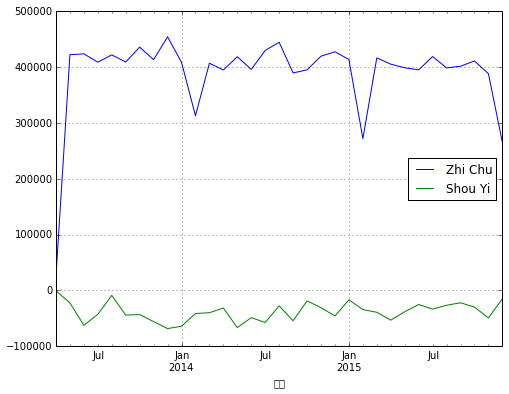

In [33]:
profit = gy_month.sum()[["支出", "盈利"]]
#profit.index = pds.DatetimeIndex(map(str,profit.index))
profit.columns= ["Zhi Chu", "Shou Yi"]
profit.plot(figsize=(8,6))

In [35]:
record_f = "./buy_record.csv"
buy_records = [l.strip().split('\t') for l in open(record_f)]


In [36]:
import re
for i, record in enumerate(buy_records):
    if record[4] == "------":
        continue
    else:
        buy_method = record[4].split("|")[0]
        detail = buy_method.split("_") # detail format 连4中1_8-1|3倍 或者 1不中|3倍
        if len(detail) == 2: # # remove 8-1,-2,-3信号
            if detail[1] in ["8-1", "8-2", "8-3"]:
                record[4] = "------"
        else:
            if detail[0] == "１不中":
                # check 是否为 连4中1后
                # get current match sequence
                start = max(i - 50, 0)
                seq = ''.join([r[2] for r in buy_records[i:start:-1]])
                rule = 'xo{1,}xoxxxx'
                r1_flag = False
                if re.match(rule, seq):
                    r1_flag = True
                # check 空格的个数
                rule2 = 'xo{1,}xo{1,}x'
                matched = re.match(rule2, seq)
                if matched:
                    matched = matched.group()
                else:
                    continue
                space_count = matched.count('o')
                if space_count > 4 or r1_flag:
                    record[4] = '------'
                    # check 2不中
                    next_record = buy_records[i+1]
                    if next_record[4] == '２不中|6倍':
                        next_record[4] = '------'
                    next_next_record = buy_records[i+2]
                    if next_next_record[4] == '３不中|9倍':
                        next_next_record[4] = '------'
            

In [38]:
# write to new buy_record.csv
outfile = open("./filter_buy_record.csv", "w")
for record in buy_records:
    outfile.write('\t'.join(record) + '\n')
outfile.flush()
outfile.close()

In [23]:
import re
help(re.match)

Help on function match in module re:

match(pattern, string, flags=0)
    Try to apply the pattern at the start of the string, returning
    a match object, or None if no match was found.



In [27]:
rule2 = 'xo{1,}xo{1,}x'
s = 'xoooxoox'
re.match(rule2, s).group().count('o')

5